# SI 370 - Homework 6 - Visualizations

## Objectives
* Data cleaning/loading
* Bokeh and/or Tableau visualizations
* Hypothesis testing

## Please fill in...
### * Your name: AJ Goldstein
### * People you worked with: I worked by myself

## **Submission Instructions:**
After completing this homework, you should turn in two files via Canvas:
1. A Jupyter Notebook file named hw6-YOUR_UNIQUE_NAME.ipynb.  Please observe the following requirements:
    * This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code.
    * You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions. Do not include such content unless required.
    * Irrelevant code and results should be deleted prior to submission.
2. An html file named hw6-YOUR_UNIQUE_NAME.html showing the preview of the above Jupyter Notebook. To create this file, select File > Download as HTML. We want this in case something breaks when we load your notebook.  This will let us see what you saw when you were done.
3. **New For this assignment** A PDF file with your solution for the last problem  (label this hw6-YOUR_UNIQUE_NAME-cereals.pdf)

# Load everything up that we need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import re

# load the bokeh stuff
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.charts import Scatter
from bokeh.charts import Bar
from bokeh.charts import Histogram
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

/Users/AJGoldstein/anaconda/envs/si370/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loading BokehJS ...

# Problem 1

You have been given a dataset of cereals (cereals.dat).  It has the following characteristics:

A value of -1 for nutrients indicates a missing observation.

Number of cases: 76

Variable Names:
* Name: Name of cereal
* mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = * Post; Q = Quaker Oats; R = Ralston Purina
* type: cold or hot
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals

Unfortunately, the data you you got isn't in some nicely formated file. If you look into it, you'll see that the delimters (things between columns) are weird.  Sometimes it's a space, sometimes a tab, sometimes a comma.  We're going to need to clean things up as we read the file

At the end of this, what we need is a clean DataFrame.  We want the following

    1) All the columns loaded in and the dataframe should have the right column names

    2) Cereal names should have the underscore replace by a space

    3) The manufacturer "letter" should be replace by the full name (e.g., 'K' should be replaced by Kelloggs)

There are multiple ways to do this but the easiest two are (1) do it as we load the file, cleaning up lines as we go, and (2) to load up the data and then fix it (doing steps 2 and 3 above) after everything is in the DataFrame.  We're going to do the second to continue practicing with DataFrames

### Problem 1a) Split the columns

The following code will load up all the lines in the file and put them in a list

In [2]:
from sys import argv

f = open('cereals.dat','r')
lines = f.readlines()

# see what's in the fourth line (note that \t is "tab" and \n is a newline)
lines[3]

'All-Bran K,C\t70\t4\t1\t260\t9\t7\t5\t320\t25\t3\t1\t0.33\t59.425505\n'

In [3]:
# MODIFY THIS FUNCTION
# the input should be a line, the output should be a list of elements (one per column)
# right now it splits on a comma, which is definitely not right
# you can do this with splits, regular expressions, etc.
def parseLine(line):
    ## REPLACE THIS PIECE
    toRet = re.split("\s|,([A-Za-z]+)", line)
    toRet = list(filter(None, toRet))
    return(toRet)


In [4]:
# test your code here
parseLine(lines[3])

['All-Bran',
 'K',
 'C',
 '70',
 '4',
 '1',
 '260',
 '9',
 '7',
 '5',
 '320',
 '25',
 '3',
 '1',
 '0.33',
 '59.425505']

If you did this correctly, you should see something like:

`['All-Bran',
 'K',
 'C',
 '70',
 '4',
 '1',
 '260',
 '9',
 '7',
 '5',
 '320',
 '25',
 '3',
 '1',
 '0.33',
 '59.425505']`

### Problem 1b) Insert into the DataFrame (see all YOUR CODE GOES HERE)

We're going to make a new DataFrame here, and we'll help you out by creating the initial columns.  This assumes you've written your parseLine function correctly.  Modify the `addRows` function below to make the code work.

In [5]:
# If you did the above correctly, we'll create the dataframe for you
# and set the column names to the first line in the data file
cols = parseLine(lines[0])
print("creating columns:",cols)
cereals = pd.DataFrame(columns=cols)

creating columns: ['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']


In [6]:
# Now you'll need to modify the code below to add the rows
def addRows(cereals,lines):
    for i in np.arange(1,len(lines)):
        dt = parseLine(lines[i])
        newRow = pd.Series(dt, index=cols)
        cereals = cereals.append(newRow, ignore_index=True)
    return(cereals)


In [7]:
# test your code here
cereals = addRows(cereals,lines)
cereals.head()

name mfr type calories protein fat sodium fiber carbo  \
0                  100%_Bran   N    C       70       4   1    130    10     5   
1          100%_Natural_Bran   Q    C      120       3   5     15     2     8   
2                   All-Bran   K    C       70       4   1    260     9     7   
3  All-Bran_with_Extra_Fiber   K    C       50       4   0    140    14     8   
4             Almond_Delight   R    C      110       2   2    200     1    14   

  sugars potass vitamins shelf weight  cups     rating  
0      6    280       25     3      1  0.33  68.402973  
1      8    135        0     3      1     1  33.983679  
2      5    320       25     3      1  0.33  59.425505  
3      0    330       25     3      1   0.5  93.704912  
4      8     -1       25     3      1  0.75  34.384843

### Problem 1c) Initial cleanup on the DataFrame

There are two problems with the data.  First, missing data is encoded as -1.  This isn't what Pandas often expects. So we want to replace -1 with NaN's  (hint: see the DataFrame.replace(...) method).  

Second, we need to make sure that the columns that have numerical values are actually numerical and not strings. If you used "split" or something like it above to break the lines apart, your column probably has the string "1" instead of the number 1.  Change all the numeric columns to actually be numeric (hint: look at astype(...)). 

In [8]:
# replace the -1 with NaN
cereals = cereals.replace([-1], [np.NaN])

# fix the numeric columns so they're actually numeric
cereals = cereals.apply(pd.to_numeric, errors = 'ignore')

# test your code
cereals.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

### Problem 1d) Replace the underscores

Replace all underscores in the name column with a space (e.g. "foo_bar_baz" should become "foo bar baz")

In [9]:
### YOUR CODE HERE
cereals['name'] = cereals['name'].str.replace('_',' ')

In [10]:
# test your code
cereals.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843

### Problem 1e) fix the manfucturer column.  Replace the single character with the full name

Use the following mapping:
* A = American Home Food Products
* G = General Mills
* K = Kelloggs
* N = Nabisco
* P = Post
* Q = Quaker Oats
* R = Ralston Purina

There are multiple ways to do this, but you should be able to do it in 1-2 lines of code

In [11]:
### YOUR CODE HERE
mfrMap = {'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs',
                  'N':'Nabisco', 'P': 'Post', 'Q': 'Quaker Oats', 'R':'Ralston Purina'}
cereals.mfr = cereals.mfr.replace(mfrMap, regex=True)

In [12]:
# test your code
cereals.head()

name             mfr type  calories  protein  fat  \
0                  100% Bran         Nabisco    C        70        4    1   
1          100% Natural Bran     Quaker Oats    C       120        3    5   
2                   All-Bran        Kelloggs    C        70        4    1   
3  All-Bran with Extra Fiber        Kelloggs    C        50        4    0   
4             Almond Delight  Ralston Purina    C       110        2    2   

   sodium  fiber  carbo  sugars  potass  vitamins  shelf  weight  cups  \
0     130   10.0    5.0       6     280        25      3     1.0  0.33   
1      15    2.0    8.0       8     135         0      3     1.0  1.00   
2     260    9.0    7.0       5     320        25      3     1.0  0.33   
3     140   14.0    8.0       0     330        25      3     1.0  0.50   
4     200    1.0   14.0       8      -1        25      3     1.0  0.75   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843

### Problem 1f) Save the DataFrame as a CSV

Dump the DataFrame to "cereals.csv"

We'll be using that later for Tableau.  Hint: there's a method in Pandas to do this for "free" (you don't have to figure out how to build complicated CSVs manually)

In [13]:
### YOUR CODE HERE
cereals.to_csv('cereals.csv')

## Problem 2
Let's try some basic Bokeh visualizations

### Problem 2a) Create a scatter plot in Bokeh.  Plot sugar by calories and color the dots by the manufacturer

In [14]:
cereals.head()

name             mfr type  calories  protein  fat  \
0                  100% Bran         Nabisco    C        70        4    1   
1          100% Natural Bran     Quaker Oats    C       120        3    5   
2                   All-Bran        Kelloggs    C        70        4    1   
3  All-Bran with Extra Fiber        Kelloggs    C        50        4    0   
4             Almond Delight  Ralston Purina    C       110        2    2   

   sodium  fiber  carbo  sugars  potass  vitamins  shelf  weight  cups  \
0     130   10.0    5.0       6     280        25      3     1.0  0.33   
1      15    2.0    8.0       8     135         0      3     1.0  1.00   
2     260    9.0    7.0       5     320        25      3     1.0  0.33   
3     140   14.0    8.0       0     330        25      3     1.0  0.50   
4     200    1.0   14.0       8      -1        25      3     1.0  0.75   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843

In [15]:
### YOUR CODE HERE
p = Scatter(cereals, x='sugars', y='calories', 
            color='mfr', legend='top_left',
            plot_width=800, plot_height=600)
show(p)

### Problem 2b) Create a bar chart in bokeh. Each bar should correspond to manufacturer. The height of the bar should be the max carbohydrates for that manufacturer.

In [16]:
### YOUR CODE HERE
p = Bar(cereals, label='mfr', values='carbo', agg='max', 
        title="Max Carbs per Manufacturer", legend=None, tools='crosshair',
        plot_width=400, plot_height=300)
show(p)

### Problem 2c) Create a histogram in bokeh for the distribution of calories.

In [17]:
### YOUR CODE HERE
hist = Histogram(cereals, values='calories', color='mfr',
                 plot_width=800, plot_height=600)
show(hist)

### Problem 2d) Create a boxplot in bokeh. Each column should be the manufacturer and we want to plot the calorie distribution.

In [18]:
### YOUR CODE HERE
from bokeh.charts import BoxPlot
p = BoxPlot(cereals, values='calories', label='mfr', 
            tools='crosshair', color='lightblue',
            title='Distribution of calories',
            legend='bottom_left',
            plot_width=800, plot_height=600)
show(p)

### Problem 2e) Create a linked scatterplot.  Basically we want two scatter plots side by side. One should show the sugar versus rating and the other should show fat versus rating.

In [19]:
# these are the tools to enable in bokeh
TOOLS = "box_select,lasso_select,reset,help"

# We created a column data source for you, use this for linking.
cerealCDS = ColumnDataSource(cereals)

In [20]:
### YOUR CODE HERE
s1 = figure(tools=TOOLS, width=250, plot_height=250)
s1.circle('sugars', 'rating', size=10, 
         fill_alpha=0.2, source=cerealCDS)

# create another one
s2 = figure(tools=TOOLS, width=250, height=250)
s2.circle('fat', 'rating', size=10, 
         fill_alpha=0.2, source=cerealCDS);

In [21]:
# put all the plots in a gridplot
p = gridplot([[s1, s2]])

# show the results
show(p)

## Problem 3

Inspired by Maneesh Agrawala

### Do this individually

Your goal is to create *three* hypotheses about the cereal dataset and to generate visualizations to investigate those hypotheses. A simple one might be: "calories and sugar correlate in cereal."  This is true, but not very interesting.  The data are very rich so you should come up with something new.

In a separate file (Word, Google Docs, etc.) write out the hypotheses. Paste in the visualization you created. Present arguments about why the visualization is expressive and/or effective given the hypothesis and then tell us if the hypothesis appears valid or not. The writeup should be no longer than one very short paragraph per hypothesis. When you're done, transform this document to a PDF and upload it with your homework.

While you can experiment with as many hypotheses as you want, in the end we only want three.  Ideally your visualizations will consist of at least one from Bokeh and one from Tableau.   For the Tableau visualizations you *must change* the font and colors from the default. If appropriate, *annotate* the visualization to point out key features that are relevant to your evidence.

### Additional guidance:

Your task is to download this data and design a static (i.e., single image) visualization that you believe effectively communicates your idea. While you must use the data set given, note that you are free to filter, transform and augment the data as you see fit to highlight the elements that you think are most important in the data set.

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story (or stories) are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design. You do not have to visualize every dimension of the data.

In your write-up, you should provide a rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

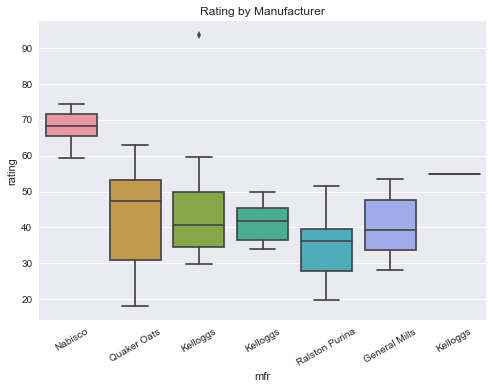

In [46]:
# plot sugar by manufacturer
ax = sns.boxplot(x='mfr',y='rating',data=cereals)
ax.set_xticklabels(cereals.mfr, rotation=30);
plt.title('Rating by Manufacturer')

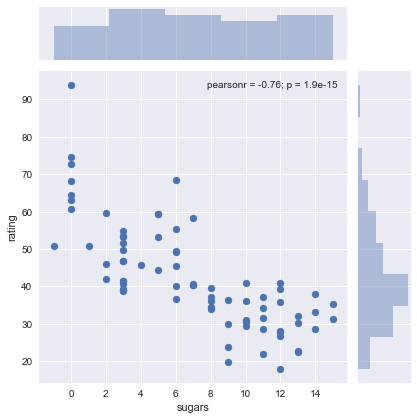

In [41]:
# plot sugar and rating
sns.jointplot(x='sugars', y='rating', data=cereals)

In [48]:
hist = Histogram(cereals, values='sugars', color='mfr',
                 legend = 'top_left', bins = 10, title='Manufacturer Sugars',
                 plot_width=800, plot_height=600)
show(hist)